# Casos Covid19
El objetivo de este analisis es aprender a manejar algunos conceptos con series de tiempo y llegar a graficar casos positivos, negativos y sospechosos de la base de datos que publica el Gobierno de la Ciudad de Buenos Aires en su portal: https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/casos-covid-19/casos_covid19.xlsx
La idea es que se pueda actualizar el CSV sin tener que modificar el notebook para poder viualizar los datos actualizados

In [1]:
import pandas as pd


csv = pd.read_excel('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/casos-covid-19/casos_covid19.xlsx')
data=pd.DataFrame(csv)
data.head()
covid = data
#data = covid

### Creamos una ventana de tiempo para predecir

In [134]:
from datetime import datetime
from datetime import timedelta
dias=30
start = datetime.now()
end = start + timedelta(days=dias)
start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')
#forecast = model_fit.predict(start=start, end=end)
print(start)
print(end)

2020-11-18
2020-12-18


In [2]:
#from pandas import datetime
#start_index = datetime.now().strftime('%Y-%m-%d')
#end_index = datetime(1990, 12, 26)
#forecast = model_fit.predict(start=start_index, end=end_index)

In [3]:
data = pd.get_dummies (data, columns = ['fallecido'])

In [4]:
data.head()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fecha_alta,tipo_contagio,fallecido_si
0,4204728,2020-11-09,2020-11-09,2020-11-09,CABA,PALERMO,14.0,femenino,42.0,confirmado,NaT,2020-11-13,Comunitario,0
1,4207397,2020-11-09,2020-11-09,2020-11-10,CABA,BARRACAS,4.0,masculino,25.0,confirmado,NaT,2020-11-14,Comunitario,0
2,4207956,2020-11-09,2020-11-03,2020-11-03,CABA,CONSTITUCION,1.0,masculino,25.0,confirmado,NaT,2020-11-13,Comunitario,0
3,4217908,2020-11-09,2020-11-03,2020-11-04,CABA,VILLA SANTA RITA,11.0,femenino,53.0,confirmado,NaT,2020-11-13,Contacto,0
4,4220496,2020-11-09,2020-11-09,2020-11-10,CABA,BOEDO,5.0,masculino,45.0,confirmado,NaT,2020-11-13,En Investigación,0


### Dejamos solo lo de CABA y vemos los nulos

In [5]:
data=data.loc[ (data['provincia'] == 'CABA')]

In [6]:
print("\nNombre de las columnas y valores faltantes por columna: \n\n" )
data.isnull().sum()


Nombre de las columnas y valores faltantes por columna: 




numero_de_caso              0
fecha_apertura_snvs         0
fecha_toma_muestra       2507
fecha_clasificacion         0
provincia                   0
barrio                  14401
comuna                  14401
genero                      0
edad                      300
clasificacion               0
fecha_fallecimiento    438175
fecha_alta             391647
tipo_contagio          291133
fallecido_si                0
dtype: int64

### Quitamos las columnas de fallecido y fecha_fallecimiento por la cantidad de valores nulos
Además el objeto de este análisis es identificar la tendencia de positividad respecto de tests realizados

In [7]:
data=pd.DataFrame(data,columns=['fecha_toma_muestra','genero','edad','clasificacion','fallecido_si'])

In [8]:
data.isnull().sum()

fecha_toma_muestra    2507
genero                   0
edad                   300
clasificacion            0
fallecido_si             0
dtype: int64

### Convertimos fecha_toma_muestra a un formato fecha con la funcion de pandas : to_datetime

In [9]:
data['fecha_toma_muestra'] = pd.to_datetime(data['fecha_toma_muestra'])
data.dtypes

fecha_toma_muestra    datetime64[ns]
genero                        object
edad                         float64
clasificacion                 object
fallecido_si                   uint8
dtype: object

### Eliminamos los registros anteriores al 11 de marzo de 2020 ya que es la fecha en que la ORGANIZACIÓN MUNDIAL DE LA SALUD (OMS), declaró el brote del nuevo coronavirus como una pandemia

In [10]:
data.fecha_toma_muestra = data.loc[ (data['fecha_toma_muestra'] >= '2020-03-11' )]

### Convertimos las categóricas a Dummies para poder contabilizar y agrupar luego

In [11]:
data = pd.get_dummies (data, columns = ['genero','clasificacion'])

In [12]:
data = pd.DataFrame(data)
data.head()

,fecha_toma_muestra,edad,fallecido_si,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso
0,2020-11-09 00:00:00,42.0,0,1,0,1,0,0
1,2020-11-09 00:00:00,25.0,0,0,1,1,0,0
2,2020-11-03 00:00:00,25.0,0,0,1,1,0,0
3,2020-11-03 00:00:00,53.0,0,1,0,1,0,0
4,2020-11-09 00:00:00,45.0,0,0,1,1,0,0


In [13]:
data.isnull().sum()

fecha_toma_muestra          2668
edad                         300
fallecido_si                   0
genero_femenino                0
genero_masculino               0
clasificacion_confirmado       0
clasificacion_descartado       0
clasificacion_sospechoso       0
dtype: int64

### Completamos los valores faltantes de edad con el promedio

In [14]:
data.edad = data.edad.fillna(data.edad.mean())

In [15]:
data.isnull().sum()

fecha_toma_muestra          2668
edad                           0
fallecido_si                   0
genero_femenino                0
genero_masculino               0
clasificacion_confirmado       0
clasificacion_descartado       0
clasificacion_sospechoso       0
dtype: int64

### Completamos valores faltantes de fecha con el valor del registro anterior

In [16]:
data.fecha_toma_muestra.fillna(method='ffill', inplace = True)

In [17]:
data.isnull().sum()

fecha_toma_muestra          0
edad                        0
fallecido_si                0
genero_femenino             0
genero_masculino            0
clasificacion_confirmado    0
clasificacion_descartado    0
clasificacion_sospechoso    0
dtype: int64

### Pasamos lo que tenemos a covid.csv ya optimizado para seguirlo trabajando luego y así optimizar el tiempo

In [18]:
data.to_csv('covid.csv',index=False)
csv = pd.read_csv('covid.csv')
data = pd.DataFrame(csv)

In [19]:
data.head()

,fecha_toma_muestra,edad,fallecido_si,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso
0,2020-11-09,42.0,0,1,0,1,0,0
1,2020-11-09,25.0,0,0,1,1,0,0
2,2020-11-03,25.0,0,0,1,1,0,0
3,2020-11-03,53.0,0,1,0,1,0,0
4,2020-11-09,45.0,0,0,1,1,0,0


### Eliminamos la columna edad ya que ahora no la usaremos

In [20]:
#data.drop(columns = ['edad'], inplace = True)

In [21]:
data.head()

,fecha_toma_muestra,edad,fallecido_si,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso
0,2020-11-09,42.0,0,1,0,1,0,0
1,2020-11-09,25.0,0,0,1,1,0,0
2,2020-11-03,25.0,0,0,1,1,0,0
3,2020-11-03,53.0,0,1,0,1,0,0
4,2020-11-09,45.0,0,0,1,1,0,0


### Ponemos fecha_toma_muestra como index y nos aseguramos que este como tipo de dato timeseries

In [22]:
data.index = data['fecha_toma_muestra']
data.drop(columns = ['fecha_toma_muestra'], inplace = True)

In [23]:
data.index = pd.to_datetime(data.index)

### Generamos un nuevo feature que sea test realizados que será la suma de confirmados + descartados + sospechosos

In [24]:
data['numtests'] = data[["clasificacion_confirmado", "clasificacion_descartado", "clasificacion_sospechoso"]].sum(axis=1)

### Resampleo por día, por semana y por mes, siempre utilizando .sum
Más info en la siguiente celda oculta

### Alias de frecuencia mas utilizados en : <offset frequency> 
'nD'           ==> n days  
'nM'           ==> n months
'nW'           ==> n weeks
'nD'           ==> n days  
'nH'           ==> n hours  
'nT' or 'nmin' ==> n mins  
'nS'           ==> n seconds
'nL' or 'nms'  ==> n milliseconds
 También se pueden combinar por ejemplo: 'nD.mH'        ==> n days, m hours
<BR>
### Lista de funciones mas utilizadas en <aggregation-operation> :
Suma: df.resample(timeinterval).sum()
Promedio: df.resample(timeinterval).mean()
Max: df.resample(timeinterval).max()
Min: df.resample(timeinterval).min()
Primero: df.resample(timeinterval).first()
Último: df.resample(timeinterval).last()
Desviación Std: df.resample(timeinterval).std()

In [25]:
data_dia = data.resample('D').sum()
data_semana = data.resample('W').sum()
data_mes = data.resample('M').sum()

Visualizamos como queda el resample por mes:

In [26]:
data_mes.tail(4)

,edad,fallecido_si,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso,numtests
fecha_toma_muestra,,,,,,,,
2020-08-31,3.617275e+06,1478,47218,40851,37041,49714,1314,88069
2020-09-30,3.604704e+06,1073,47232,40535,29252,57223,1292,87767
2020-10-31,3.615701e+06,512,48120,40128,19385,67553,1310,88248
2020-11-30,1.328657e+06,53,17533,15226,5262,25885,1612,32759


In [27]:
data_semana.tail(4)

,edad,fallecido_si,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso,numtests
fecha_toma_muestra,,,,,,,,
2020-11-01,718882.389375,60,9666,7957,2921,14204,498,17623
2020-11-08,696743.084062,35,9264,7864,2682,13845,601,17128
2020-11-15,550484.389375,14,7161,6442,2255,10413,935,13603
2020-11-22,3058.000000,0,38,33,3,30,38,71


### Comenzamos a graficar

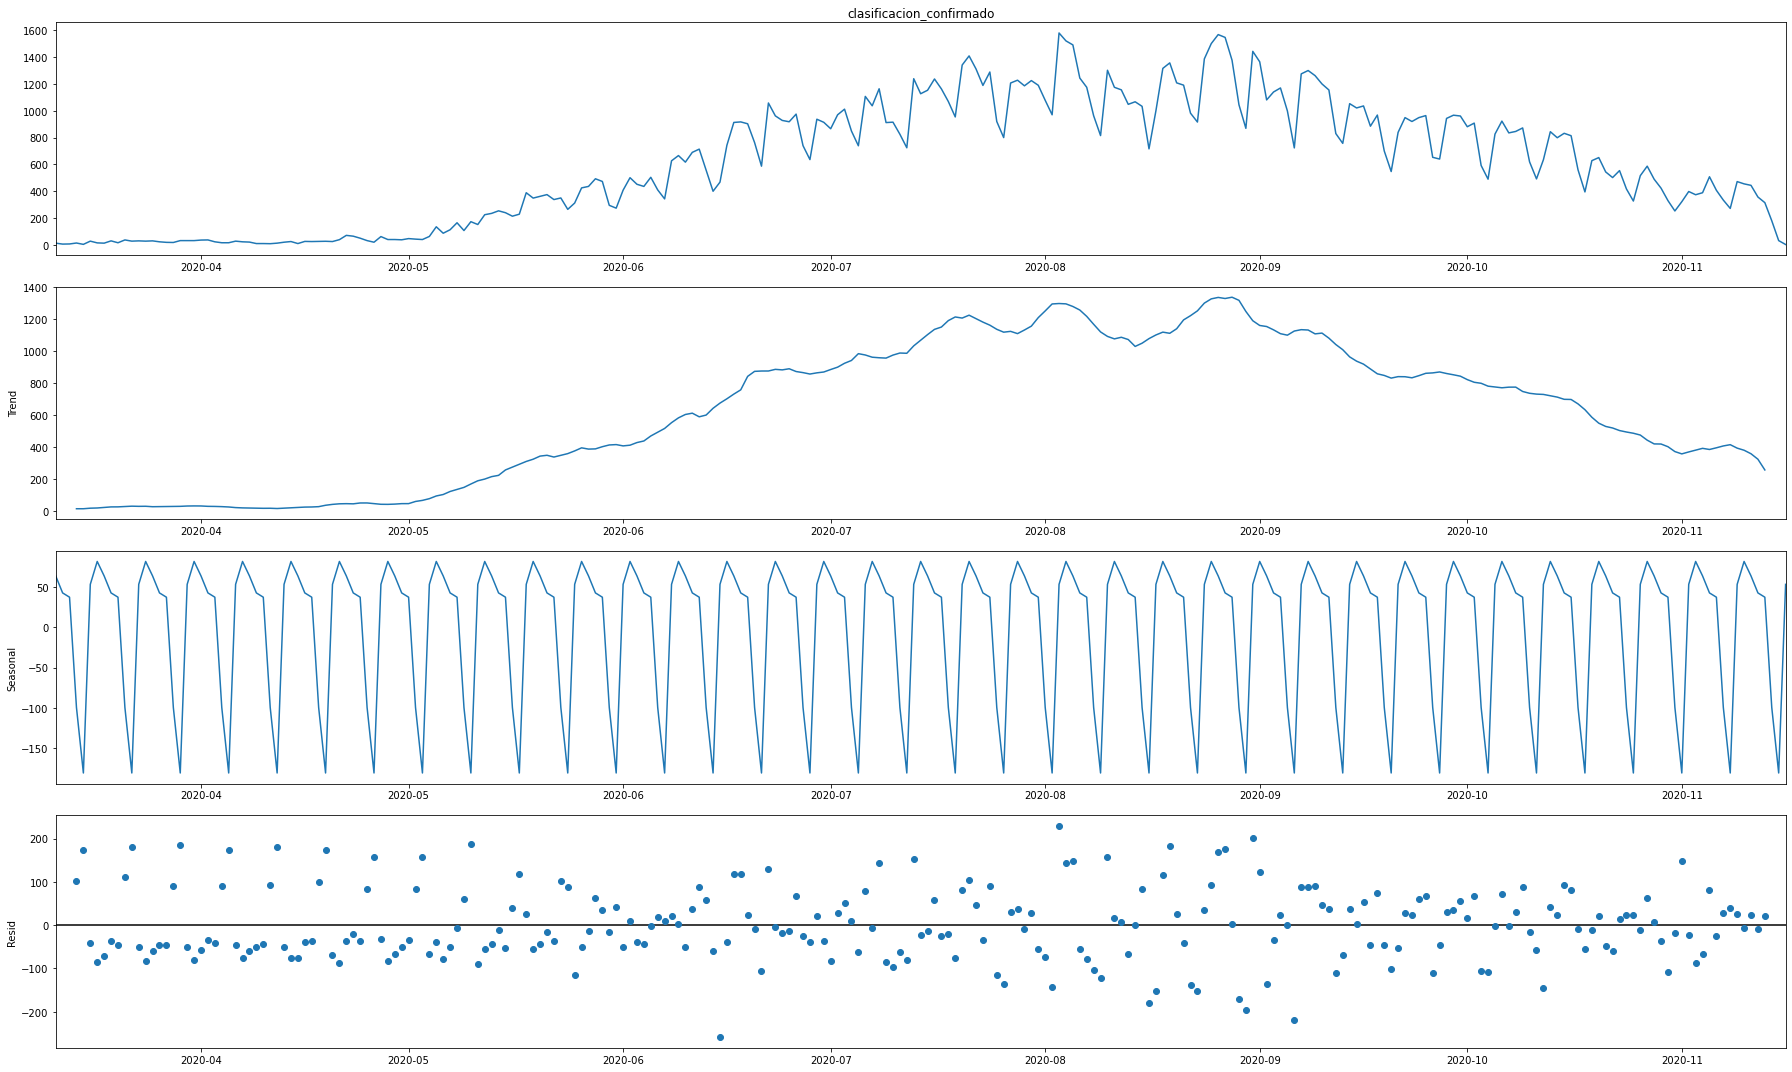

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

confirmado = seasonal_decompose(data_dia.clasificacion_confirmado, model='additive')
confirmado.trend
confirmado.seasonal

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [25,15]
confirmado.plot()
plt.show()

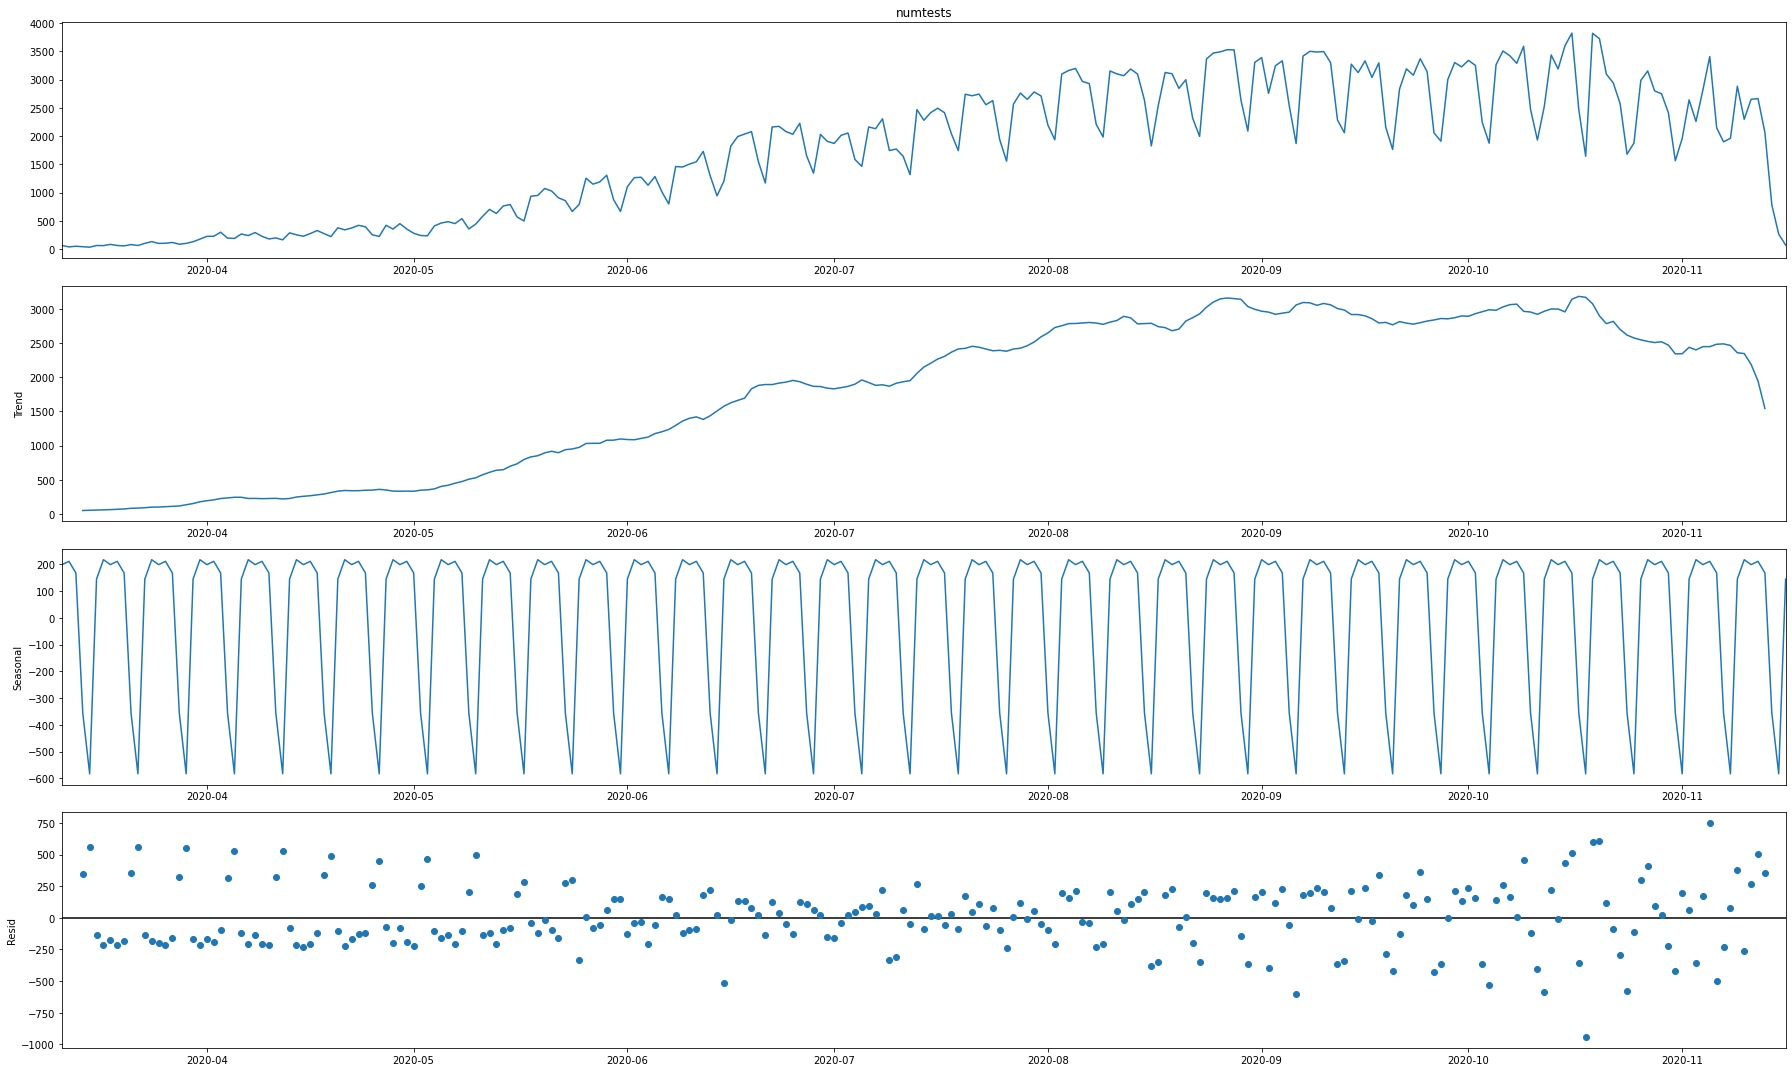

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

numtests = seasonal_decompose(data_dia.numtests, model='additive')
numtests.trend
numtests.seasonal

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [25,15]
numtests.plot()
plt.show()

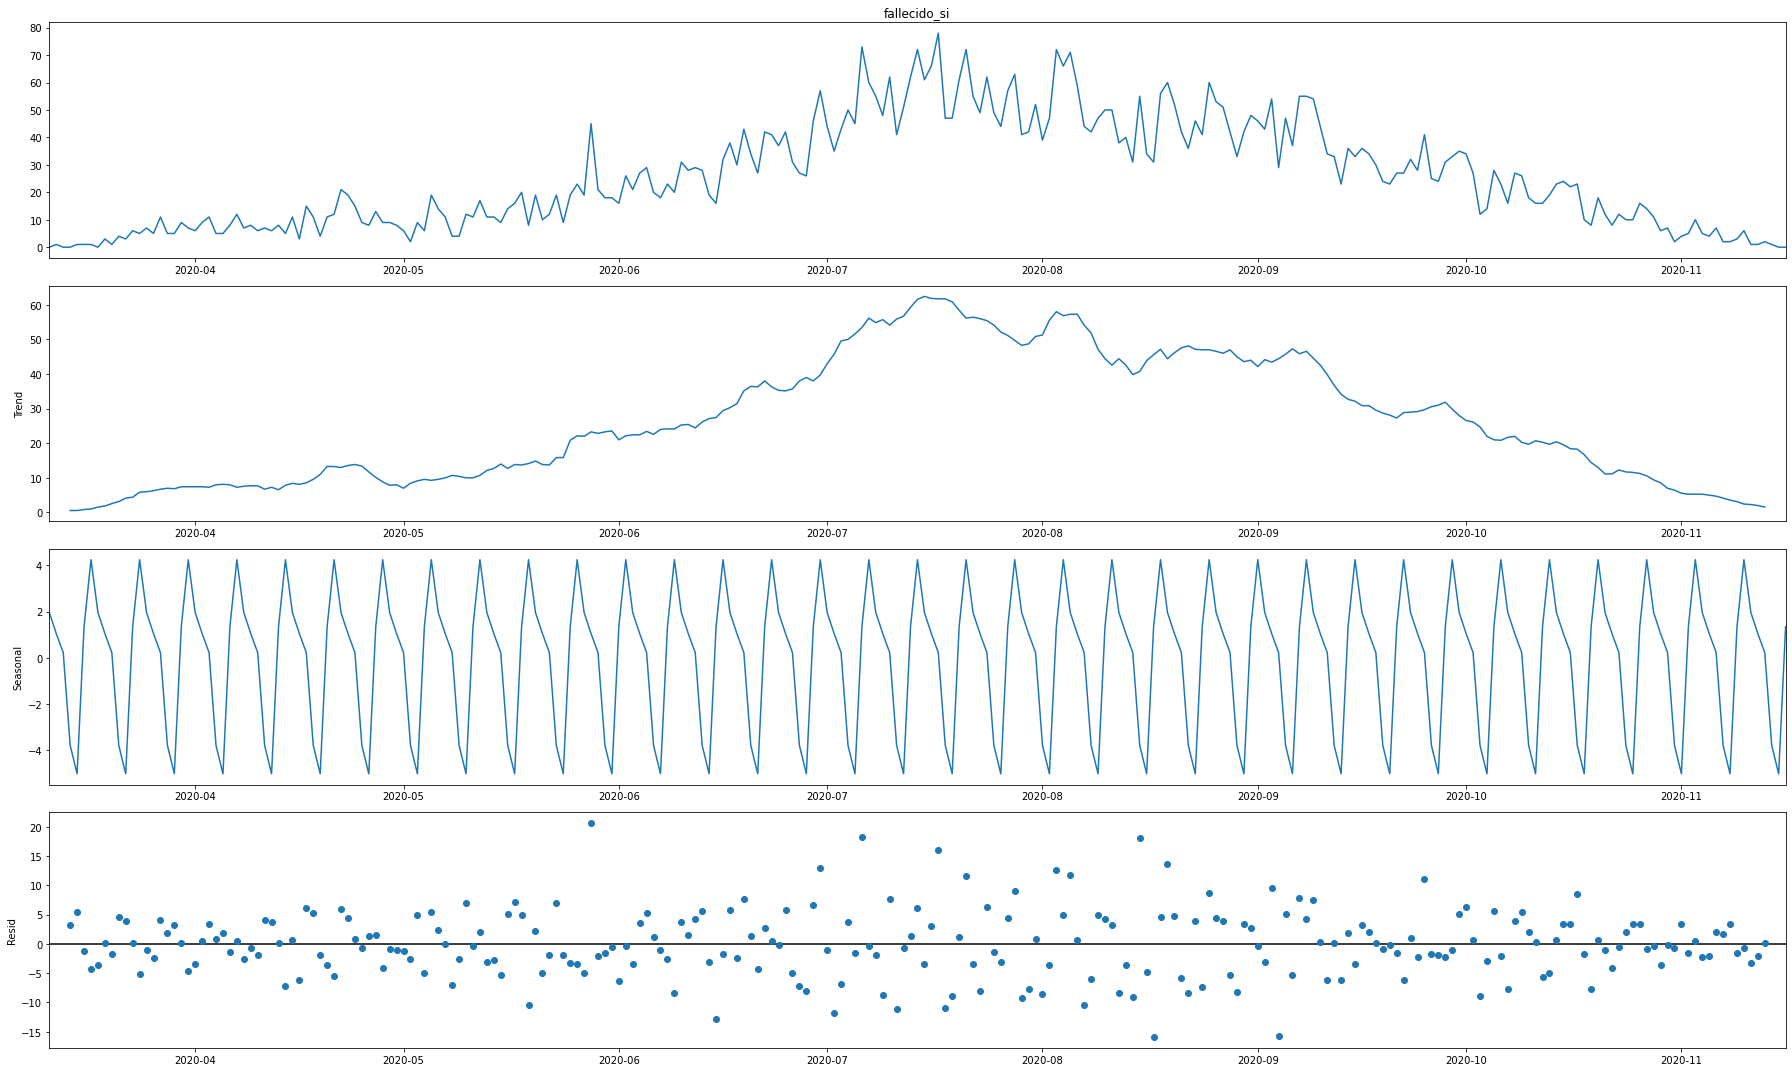

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

fallecido_si = seasonal_decompose(data_dia.fallecido_si, model='additive')
fallecido_si.trend
fallecido_si.seasonal
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [25,15]
fallecido_si.plot()
plt.show()

### Comparación de casos positivos, negativos y sospechosos

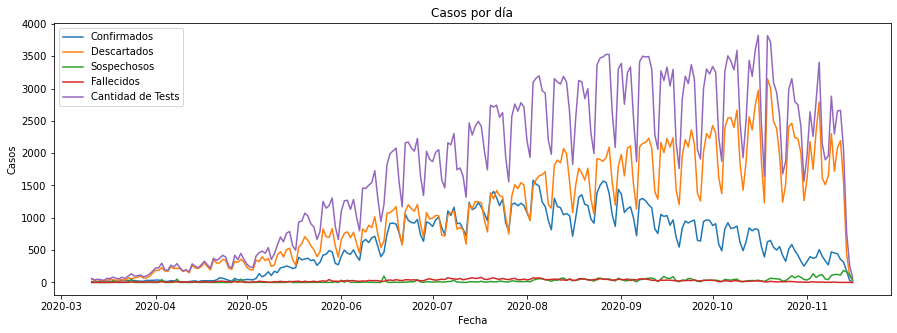

In [31]:
plt.figure(figsize = (15,5))
plt.plot(data_dia.index, data_dia.clasificacion_confirmado, label = 'Confirmados')
plt.plot(data_dia.index, data_dia.clasificacion_descartado, label = 'Descartados')
plt.plot(data_dia.index, data_dia.clasificacion_sospechoso, label = 'Sospechosos')
plt.plot(data_dia.index, data_dia.fallecido_si, label = 'Fallecidos')
plt.plot(data_dia.index, data_dia.numtests, label = 'Cantidad de Tests')
plt.legend()
plt.title('Casos por día')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.show()

### Vamos a suavizar la curva viendo los datos por semana

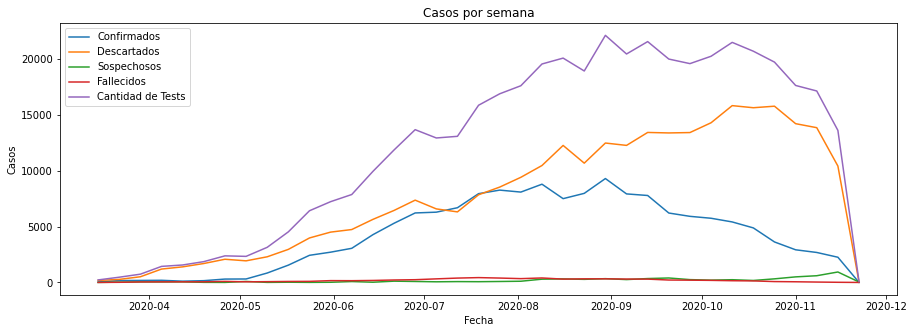

In [32]:
plt.figure(figsize = (15,5))
plt.plot(data_semana.index, data_semana.clasificacion_confirmado, label = 'Confirmados')
plt.plot(data_semana.index, data_semana.clasificacion_descartado, label = 'Descartados')
plt.plot(data_semana.index, data_semana.clasificacion_sospechoso, label = 'Sospechosos')
plt.plot(data_semana.index, data_semana.fallecido_si, label = 'Fallecidos')
plt.plot(data_semana.index, data_semana.numtests, label = 'Cantidad de Tests')
plt.legend()
plt.title('Casos por semana')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.show()

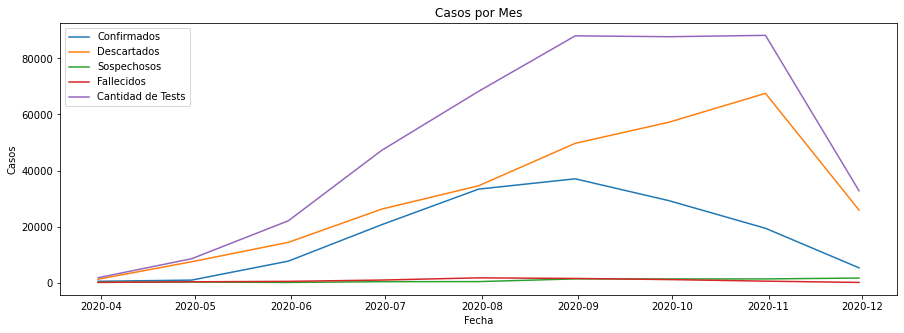

In [33]:
plt.figure(figsize = (15,5))
plt.plot(data_mes.index, data_mes.clasificacion_confirmado, label = 'Confirmados')
plt.plot(data_mes.index, data_mes.clasificacion_descartado, label = 'Descartados')
plt.plot(data_mes.index, data_mes.clasificacion_sospechoso, label = 'Sospechosos')
plt.plot(data_mes.index, data_mes.fallecido_si, label = 'Fallecidos')
plt.plot(data_mes.index, data_mes.numtests, label = 'Cantidad de Tests')
plt.legend()
plt.title('Casos por Mes')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.show()

In [34]:
### Fallecidos por semana

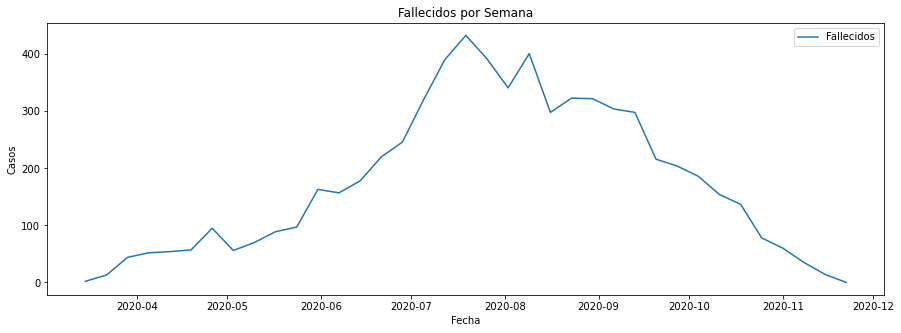

In [35]:
plt.figure(figsize = (15,5))
plt.plot(data_semana.index, data_semana.fallecido_si, label = 'Fallecidos')
plt.legend()
plt.title('Fallecidos por Semana')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.show()

In [36]:
data_semana.shape[0]

37

In [37]:
from statsmodels.tsa.stattools import acf

nlags =  data_semana.shape[0]-1
autocorr = acf(data_semana.clasificacion_confirmado, nlags = nlags)

C:\Users\Mariano\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


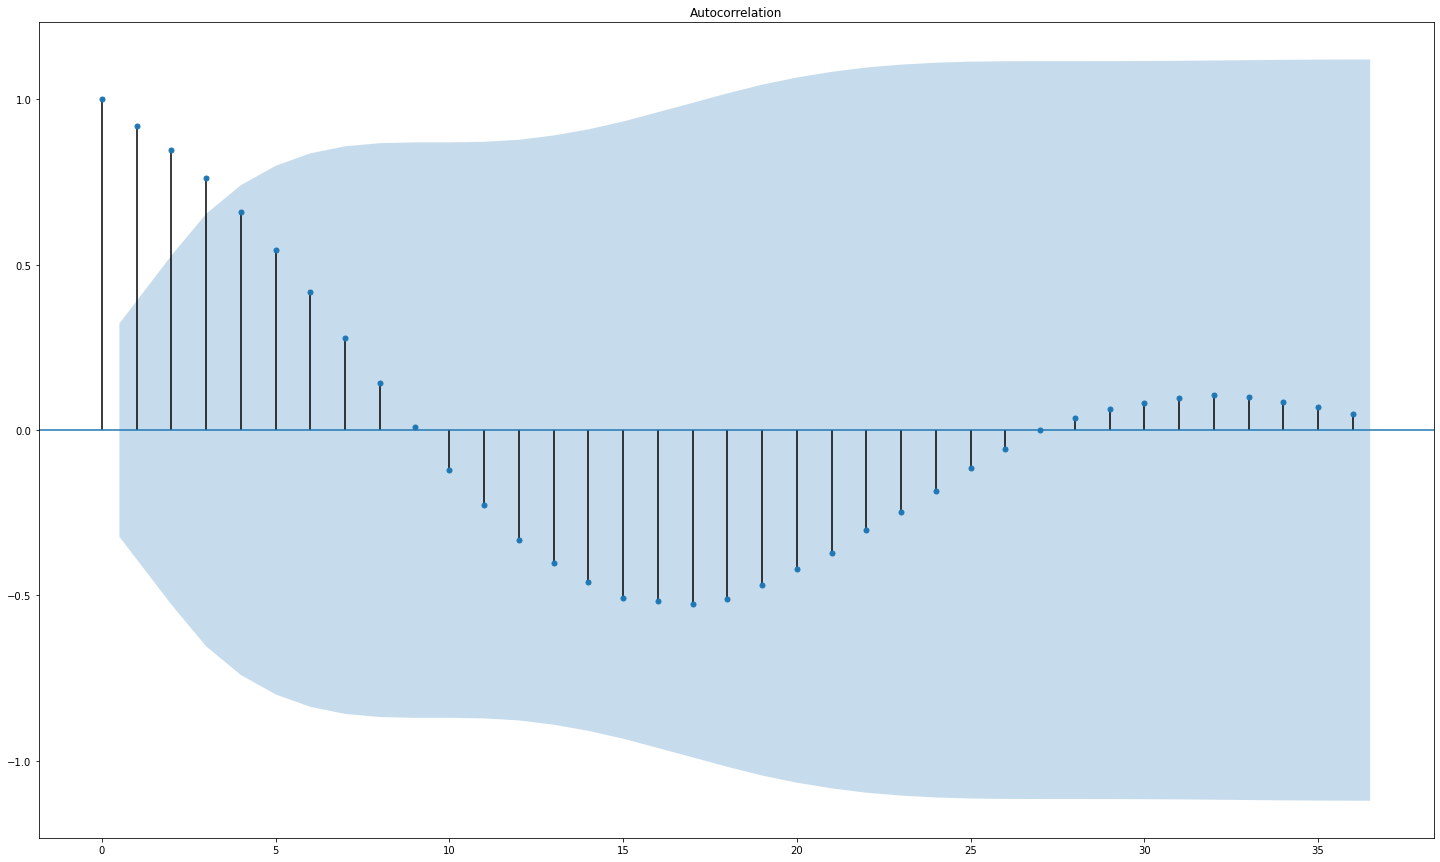

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_semana.clasificacion_confirmado, lags = nlags)
plt.show()

In [39]:
look_back= int(nlags / 8)-1
look_back

3

In [40]:
import numpy as np

N = data_semana.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(33, 3) (33,)


In [41]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = data_semana.clasificacion_confirmado.iloc[i:i+look_back]
    y[i] = data_semana.clasificacion_confirmado.iloc[i+look_back]

In [42]:
N_train = int(X.shape[0]*0.8) # cantidad de instancias que vamos a usar para entrenar. 
N_test = int(X.shape[0]-N_train) #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(26, 3) (26,)
(7, 3) (7,)


In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42, n_jobs = 4).fit(X_train,y_train)

In [44]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

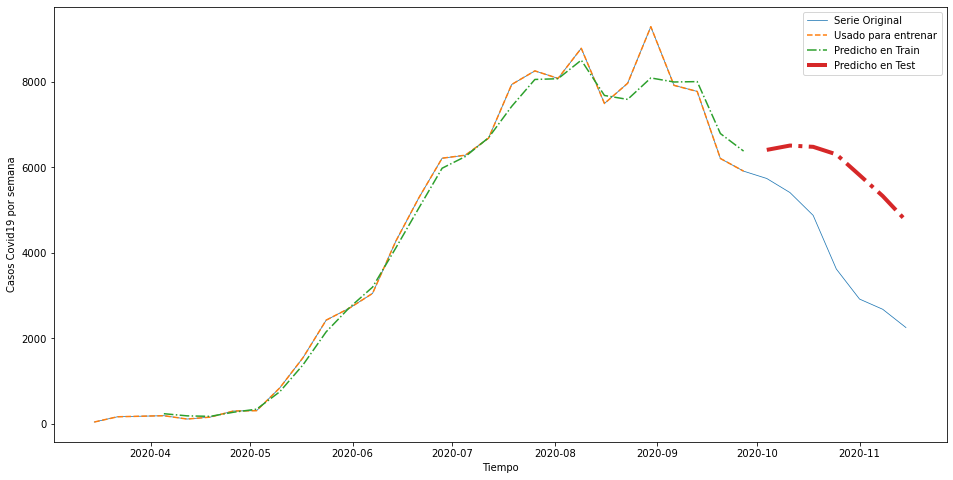

In [45]:
plt.figure(figsize=(16,8))
plt.plot(data_semana.clasificacion_confirmado.index[:length_total], data_semana.clasificacion_confirmado[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(data_semana.clasificacion_confirmado.index[:N_train + look_back], data_semana.clasificacion_confirmado[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(data_semana.clasificacion_confirmado.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(data_semana.clasificacion_confirmado.index[N_train + look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Casos Covid19 por semana')
plt.show()

In [46]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 333.71566593203494
Error en Test: 2175.3323249990362


In [47]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

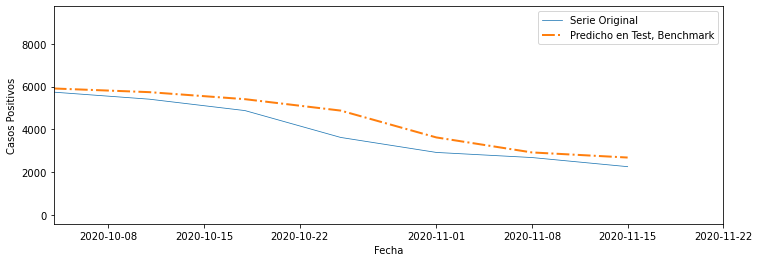

In [48]:
plt.figure(figsize=(12,4))
plt.plot(data_semana.clasificacion_confirmado.index[:length_total], data_semana.clasificacion_confirmado[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(data_semana.clasificacion_confirmado.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(data_semana.clasificacion_confirmado.index[N_train+look_back], data_semana.clasificacion_confirmado.index[length_total])
plt.xlabel('Fecha')
plt.ylabel('Casos Positivos')
plt.legend()
plt.show()

In [49]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

624.816658823096


3. Prophet¶
Instala y estudia las características de esta librería. Intenta utilizarla para obtener los componentes de la serie y para predecir. ¡Recuerda seguir la documentación!

In [50]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [51]:
df = data_dia

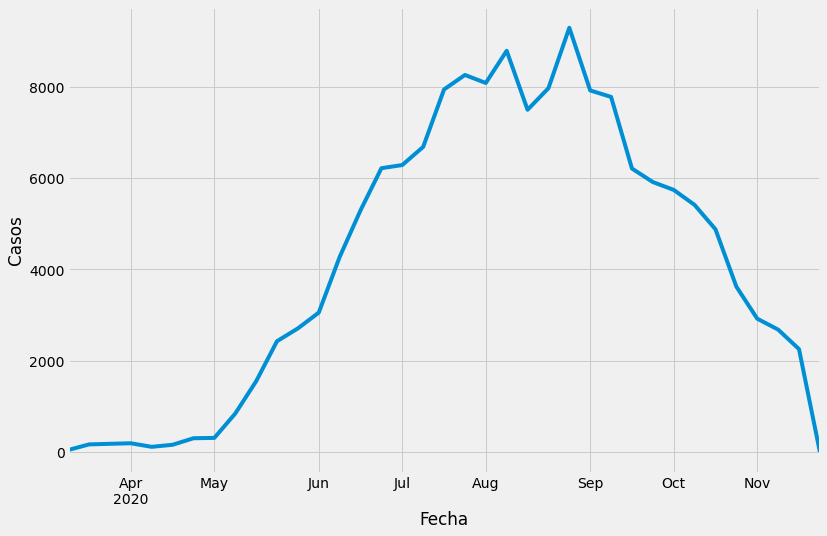

In [52]:
ax = data_semana.clasificacion_confirmado.plot(figsize=(12, 8))
ax.set_ylabel('Casos')
ax.set_xlabel('Fecha')
plt.show()

In [53]:
df = df.drop(['genero_femenino', 'genero_masculino', 'clasificacion_descartado', 'clasificacion_sospechoso', 'numtests'], axis=1)

In [54]:
#pip install fbprophet
#pip install plotly
#pip install ipywidgets

In [55]:
from fbprophet import Prophet
df = df.rename(columns={"clasificacion_confirmado": "y", "fecha_toma_muestra": "ds"})

In [56]:
df['ds'] = df.index

In [66]:
m = Prophet(daily_seasonality=True, seasonality_prior_scale=0.5)
m.fit(df)
future = m.make_future_dataframe(periods=21)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


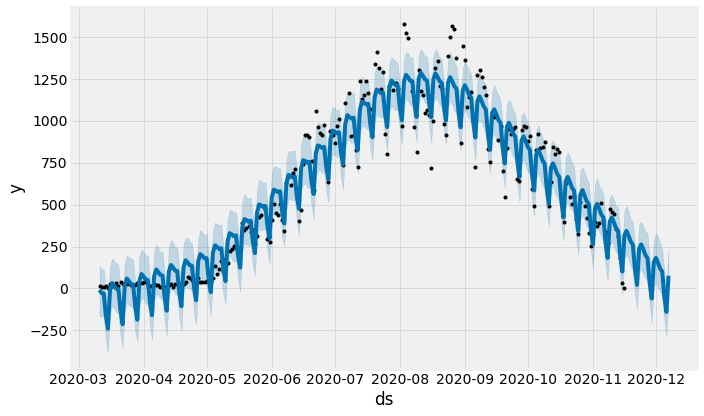

In [67]:
fig1 = m.plot(forecast)

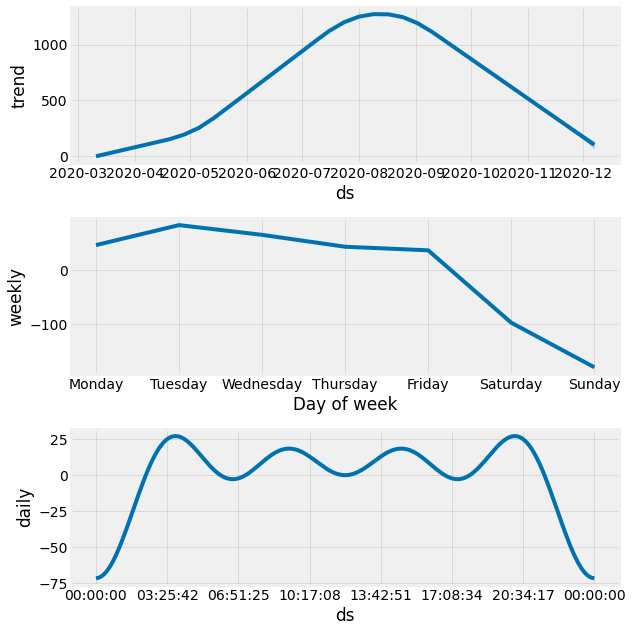

In [73]:
fig2 = m.plot_components(forecast,plot_cap=True, uncertainty=True,weekly_start=1)

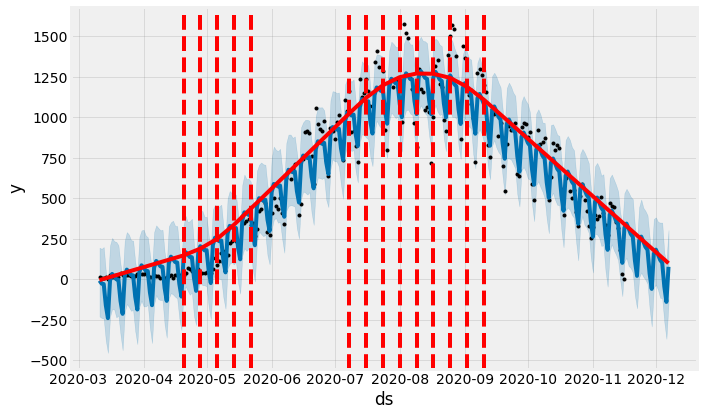

In [137]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast,plot_cap=True,uncertainty=True)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [82]:
m.changepoints

8     2020-03-19
16    2020-03-27
24    2020-04-04
32    2020-04-12
40    2020-04-20
48    2020-04-28
56    2020-05-06
64    2020-05-14
72    2020-05-22
80    2020-05-30
88    2020-06-07
96    2020-06-15
103   2020-06-22
111   2020-06-30
119   2020-07-08
127   2020-07-16
135   2020-07-24
143   2020-08-01
151   2020-08-09
159   2020-08-17
167   2020-08-25
175   2020-09-02
183   2020-09-10
191   2020-09-18
199   2020-09-26
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


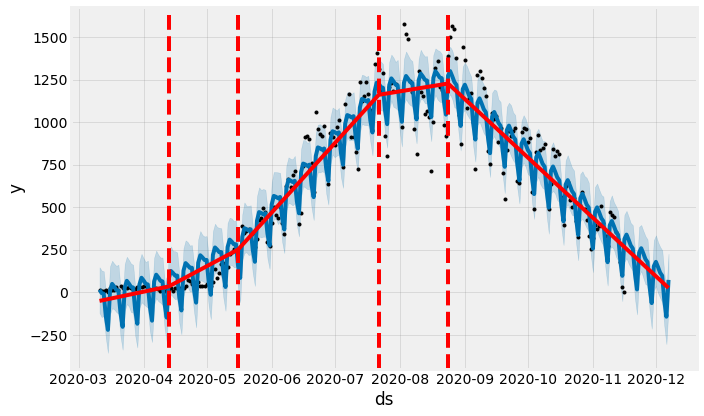

In [83]:
pro_change= Prophet(n_changepoints=6, weekly_seasonality=True,changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [108]:
forecast = Prophet(daily_seasonality=True,interval_width=0.95,holidays=None,uncertainty_samples=1000).fit(df).predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


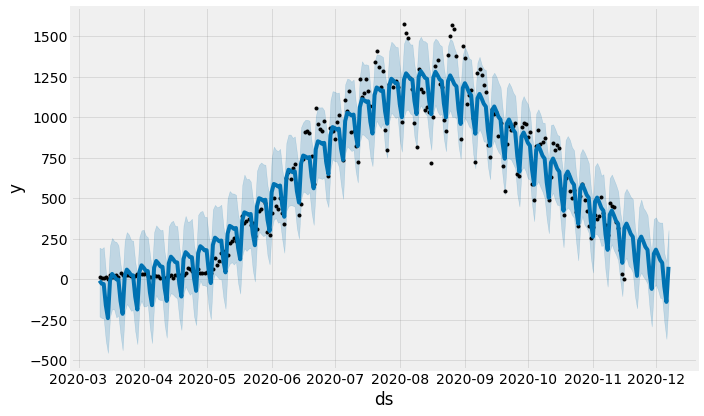

In [109]:
fig4 = m.plot(forecast)

In [135]:
from fbprophet.plot import plot_plotly, plot_components_plotly
import plotly.express as px
df.head()
fig = px.bar(df)
fig.show()

#plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)